In [1]:
# Imports
import matplotlib.pyplot as plt

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
import numpy as np
import DQN.agent as agent
import DQN.models as models
import maze_generator.maze_dataset as md
import maze_dataset



In [2]:
dataset = md.Maze_dataset(1,(5,5),'dfs')
maze = dataset[0]

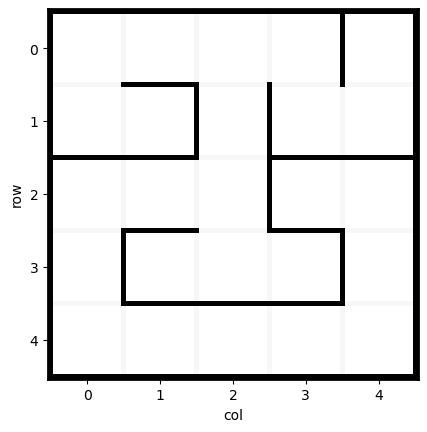

In [3]:
for i in range(len(dataset)):
    dataset.show_maze(i)

In [4]:
mult_agent = agent.maze_agents(models.basic_NN,vision=3,action_type='full')
mult_agent.run_agent(maze,len_game=50,num_agents=4,epsilon=1,sample_prob=False)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


cumulative reward: [-12.5    4.65 -19.   -23.8 ]


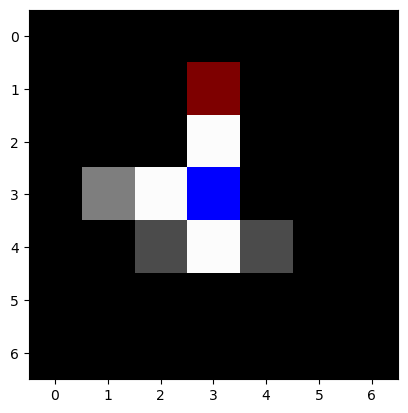

In [5]:
mult_agent.animate_last_replay(0,name='test1')